# Random Forest Classification

## Dataset

Have a quick look at the dataset.

In [1]:
%cat ../00_data/Social_Network_Ads.csv | head

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0
27,84000,0
32,150000,1
25,33000,0


In [2]:
%cat ../00_data/Social_Network_Ads.csv | tail

48,33000,1
47,23000,1
45,45000,1
60,42000,1
39,59000,0
46,41000,1
51,23000,1
50,20000,1
36,33000,0
49,36000,1

## Goal

Create a classification model to predict which customer would buy a new SUV.

## Load the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [4]:
df = pd.read_csv('../00_data/Social_Network_Ads.csv', sep=',')

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.shape

(400, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
np.sum(df.isna(), axis=0)

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Target Variable and Features

+ Target Variable: `Purchased`
+ Features:
    + `Age`
    + `EstimatedSalary`


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
X[:10]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]])

In [10]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Split the training and testing set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Fit and train the model

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the test set results

In [13]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

## Model Preformance

### Confusion Matrix

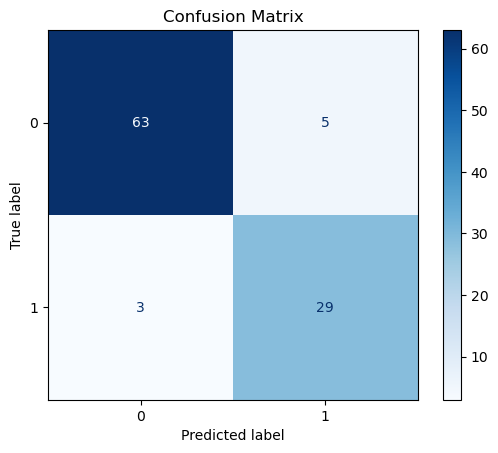

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues,
             colorbar=True)
plt.title("Confusion Matrix")
plt.show()

### Accuracy Score

In [15]:
ac = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {ac*100}%')

Accuracy on test set: 92.0%


## Model Viz

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_27388/2226651224.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


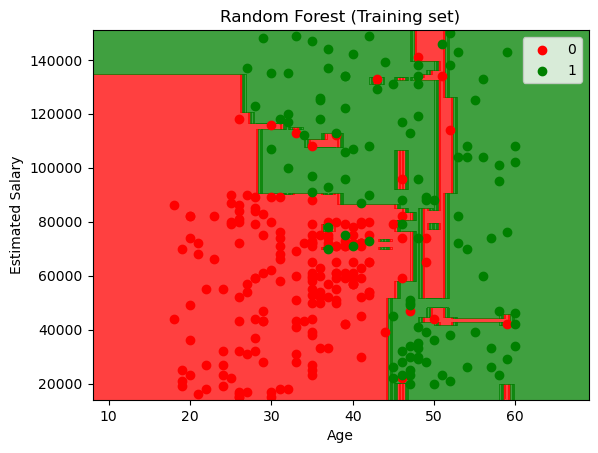

In [16]:
from matplotlib.colors import ListedColormap

#training set
X_set, y_set = X_train, y_train
name = 'Training set'
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title(f'Random Forest ({name})')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_27388/121587262.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


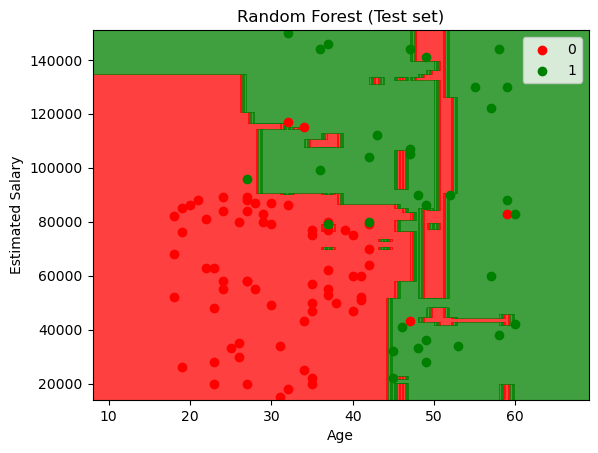

In [17]:
# test set
X_set, y_set = X_test, y_test
name = 'Test set'
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title(f'Random Forest ({name})')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Cross Validation and tune params

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    steps=[
        ("rf", RandomForestClassifier(random_state=0))
    ]
)

# Tune the params & CV
param_grid = {
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': np.arange(1, 6),
    'rf__n_estimators': np.arange(1,10)
}

grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best params
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {(grid_search.best_score_*100):.2f}%")

# using the best model
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)*100}%')


Best Parameters: {'rf__criterion': 'gini', 'rf__max_depth': np.int64(4), 'rf__n_estimators': np.int64(4)}
Best Cross-Validation Accuracy: 91.00%
Accuracy on test set: 93.0%
